[[ 67  69 -15  66 -16  57  29   2  -5  26  -5]
 [ 65  64 -18  65 -16  53  27   3  -7  25  -6]
 [ 65  62 -18  63 -13  53  29   8  -5  27  -5]
 [ 69  64 -16  70 -13  51  27   5  -6  26  -5]]
[[ 64  65 -17  64 -16  56  31   6  -4  28  -5]
 [ 66  65 -15  67 -12  54  30   7  -6  28  -6]
 [ 67  62 -17  64 -15  52  27   4  -7  25  -7]
 [ 67  63 -16  65 -15  52  28   4  -7  24  -8]]
[[ 57 -47  -9  39  -5 -54  38 129  -1  40  -4]
 [ 58 -45 -12  39  -6 -59  31 122 -12  33 -13]
 [ 59 -41 -12  42  -6 -52  35 120  -9  41  -7]
 [ 56 -39 -13  40  -9 -47  37 118  -9  40 -10]]
[[ 59 -44  -8  42   0 -57  33 120 -10  33  -7]
 [ 60 -42 -14  40  -1 -60  28 112 -20  31 -11]
 [ 58 -39 -12  40  -7 -52  32 113 -15  36 -12]
 [ 57 -36 -12  41  -6 -44  38 119  -7  42  -9]]
[[ 46  48  -8  48  -6  49  47  46  -9  44 -10]
 [ 48  48  -8  47  -4  46  45  44 -10  43 -12]
 [ 48  49 -12  48 -11  48  44  41  -9  42 -10]
 [ 47  50 -11  48  -9  47  44  41 -11  42 -12]]
[[ 48  48 -11  48  -8  47  45  43  -8  41 -10]
 [ 49  4

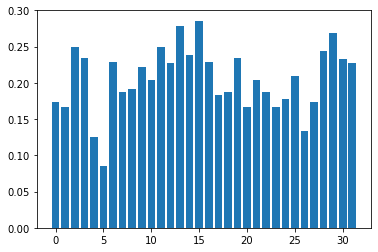

count    32.000000
mean      0.205483
std       0.044768
min       0.085106
25%       0.176812
50%       0.206924
75%       0.234043
max       0.285714
dtype: float64


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# import data
df = pd.read_csv('input/data123.csv')
experiments = np.arange(1, 7)
df_exprmnts = [0] * 7
nd_dif = [0] * 7
sgs = np.arange(2, 13)
for expr in experiments:
    df_exprmnts[expr] = df[df['experiment'] == expr]
    nd_dif[expr] = np.array(df_exprmnts[expr][['sg' + str(i) for i in sgs]])
    for i in range(4):
        nd_dif[expr][i, :] = nd_dif[expr][i + 1, :] - nd_dif[expr][i, :]
    nd_dif[expr] = np.delete(nd_dif[expr], -1, axis = 0)

    print(nd_dif[expr])


sg_xs = [2, 5, 8, 11]
sg_ys = [4, 6, 10, 12]

mus = []
for expr in [5, 6]:
    for i in range(4):
        sgx_name = (sg_xs[i] - 2)
        sgy_name = (sg_ys[i] - 2)
        for itime in range(4):
            mus += [ - nd_dif[expr][itime, sgy_name] / nd_dif[expr][itime, sgx_name]]
            # print(mus)

print(mus)
plt.bar(np.arange(0, len(mus)), mus)
plt.show()
print(pd.Series(mus).describe())